Importing the basic libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the dataset

In [3]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Calculating the correlation between the datasets and doing other visualization stuff.

In [4]:
np.corrcoef(df.YearsExperience, df.Salary)

array([[ 1.        ,  0.97824162],
       [ 0.97824162,  1.        ]])

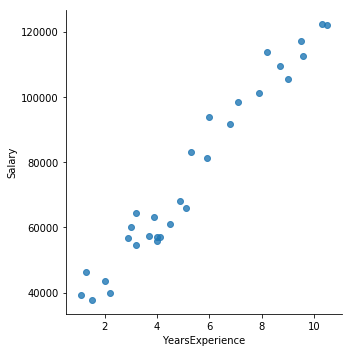

In [5]:
sns.lmplot(x = 'YearsExperience', y = 'Salary', data  = df, fit_reg=False)

In [8]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values
##splitting the data:
from sklearn.cross_validation import train_test_split
trainx, testx, trainy, testy = train_test_split(X, Y, test_size = 0.333, random_state = 0)
X

array([[  1.1],
       [  1.3],
       [  1.5],
       [  2. ],
       [  2.2],
       [  2.9],
       [  3. ],
       [  3.2],
       [  3.2],
       [  3.7],
       [  3.9],
       [  4. ],
       [  4. ],
       [  4.1],
       [  4.5],
       [  4.9],
       [  5.1],
       [  5.3],
       [  5.9],
       [  6. ],
       [  6.8],
       [  7.1],
       [  7.9],
       [  8.2],
       [  8.7],
       [  9. ],
       [  9.5],
       [  9.6],
       [ 10.3],
       [ 10.5]])

Building the linear regression:

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
f = reg.fit(trainx, trainy)
predy = f.predict(testx)


In [29]:
t = pd.DataFrame(testy, columns = ['Actual value'])
r= pd.DataFrame(predy, columns = ['Predicted value'])
#t = pd.concat([t, r], axis =1)
t = pd.concat([t, r], axis =1)
t['Error'] = 100* (t['Actual value'] - t['Predicted value'])/(t['Actual value'])
t

,Actual value,Predicted value,Error
0,37731.0,40835.105909,-8.226938
1,122391.0,123079.399408,-0.562459
2,57081.0,65134.556261,-14.108996
3,63218.0,63265.367772,-0.074928
4,116969.0,115602.645454,1.168134
5,109431.0,108125.891499,1.192631
6,112635.0,116537.239698,-3.464500
7,55794.0,64199.962017,-15.066068
8,83088.0,76349.687193,8.109851
9,101302.0,100649.137545,0.644471


Now we try to visualize the accuracy of this function on the train set

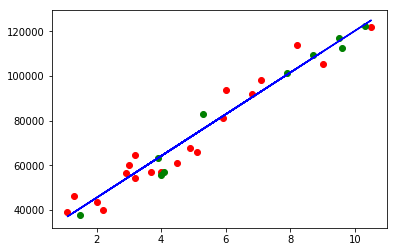

In [37]:
plt.scatter(x = trainx, y = trainy, color= 'red')
plt.scatter(x = testx, y = testy, color= 'green')

trainpred = reg.predict(trainx)
plt.plot(trainx, trainpred, color = "blue")